In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
dataset = pd.read_csv('diabetes.csv')
 
for column in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]:
  bad = (dataset[column] == 0)
  dataset.loc[bad, column] = None
 
dataset.describe()
dataset.info()
 
normalized = (dataset - dataset.mean()) / dataset.std()
normalized["Outcome"] = (normalized["Outcome"] > 0.0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [0]:
## bar plot data

diabetic_means     = normalized[normalized["Outcome"] == True].mean()[:-1]
diabetic_stds      = normalized[normalized["Outcome"] == True].std()[:-1]

non_diabetic_means = normalized[normalized["Outcome"] == False].mean()[:-1]
non_diabetic_stds  = normalized[normalized["Outcome"] == False].std()[:-1]

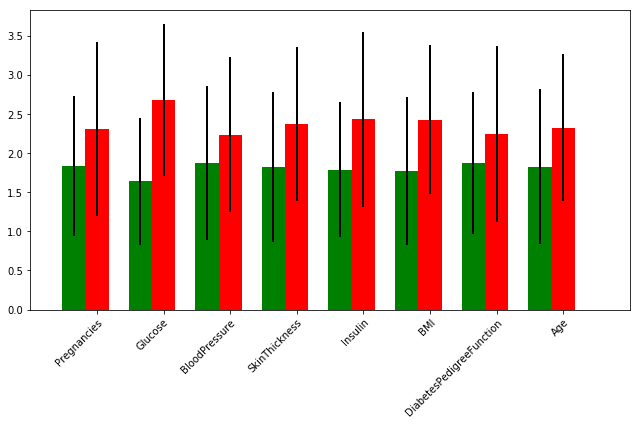

In [0]:
## bar plot

fig = plt.figure(figsize=(9, 6))

indices = np.arange(len(diabetic_means))
width = 0.35
error_args = {'ecolor': (0, 0, 0), 'linewidth': 2.0}

p1 = plt.bar(indices, diabetic_means + 2.0, width, yerr=diabetic_stds, color='r', error_kw=error_args)
p2 = plt.bar(indices-width, non_diabetic_means + 2.0, width, yerr=non_diabetic_stds, color='g', error_kw=error_args)

ax = plt.gca()
ax.set_xlim(-1.0, 8)
ax.set_xticks(indices)
ax.set_xticklabels(diabetic_means.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()

# plt.show()
fig.savefig('barplot.png')

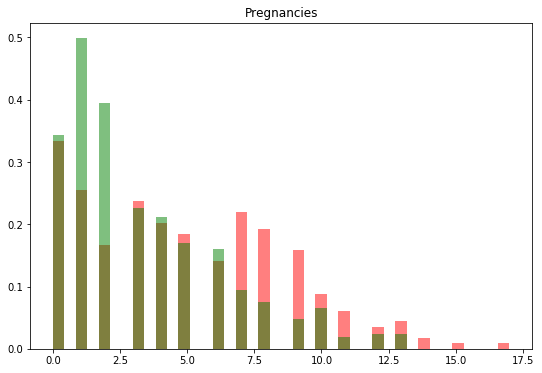

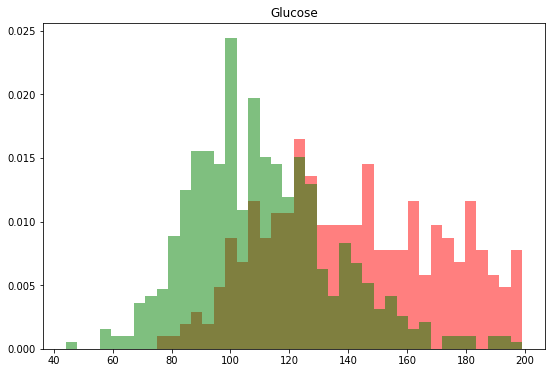

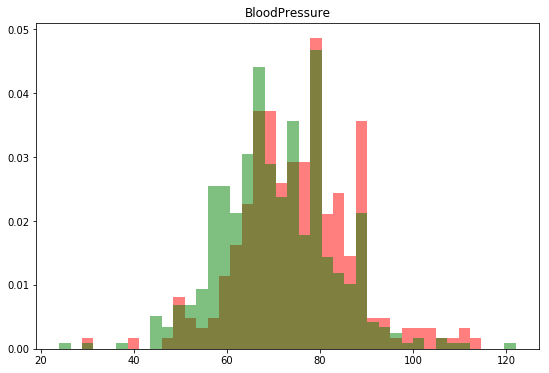

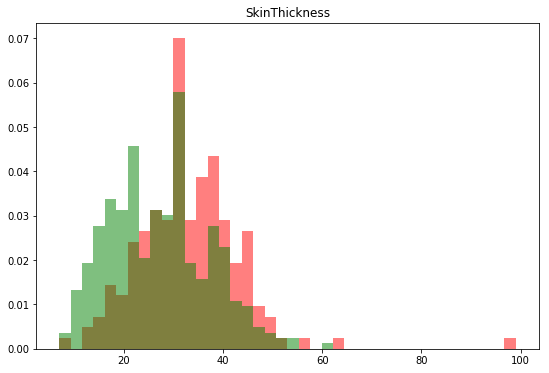

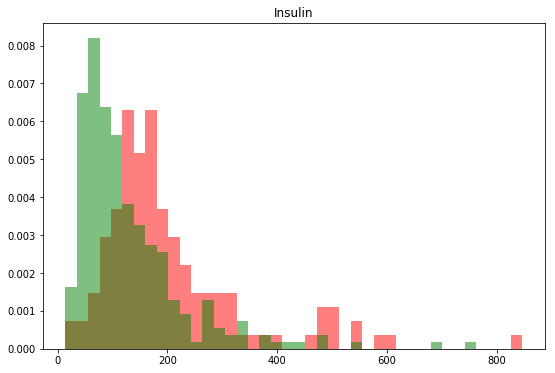

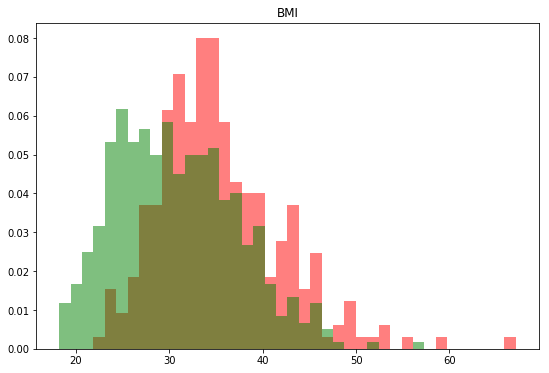

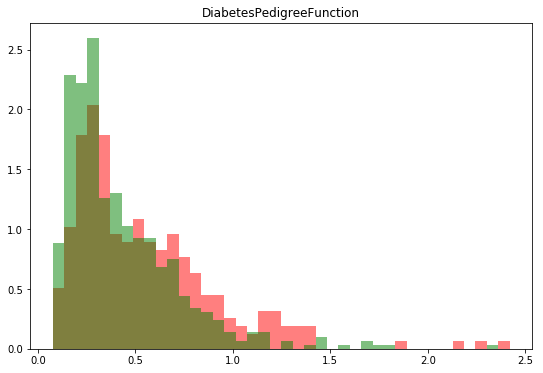

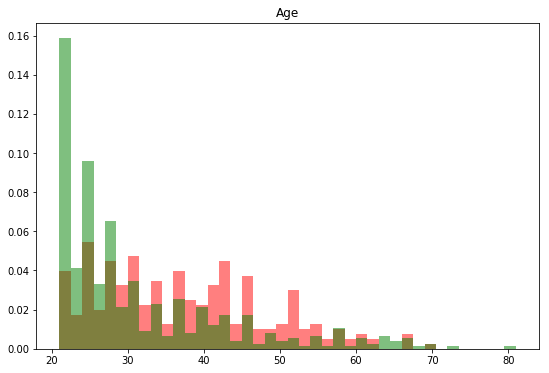

In [0]:
## Histogram of each feature, etc.

features = dataset.columns[:-1]

def histogram(feature):
    xx = dataset.loc[(dataset["Outcome"] == 0) & np.logical_not(dataset[feature].isnull()), feature]
    yy = dataset.loc[(dataset["Outcome"] == 1) & np.logical_not(dataset[feature].isnull()), feature]

    fig = plt.figure(figsize=(9, 6))
    kwargs = {
            'histtype' : 'stepfilled',
            'alpha'    : 0.5,
            'density'  : True,
            'bins'     : 40,
            'color'    : ['g', 'r', ],
    }
    plt.title(feature)
    plt.hist([xx, yy, ], **kwargs)
    # plt.show()
    fig.savefig('histogram_%s.png' % feature)

for feature in features:
    histogram(feature)

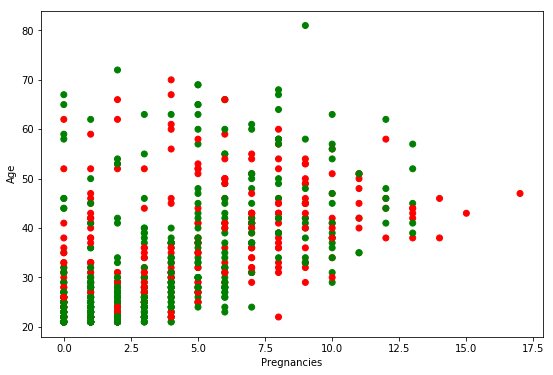

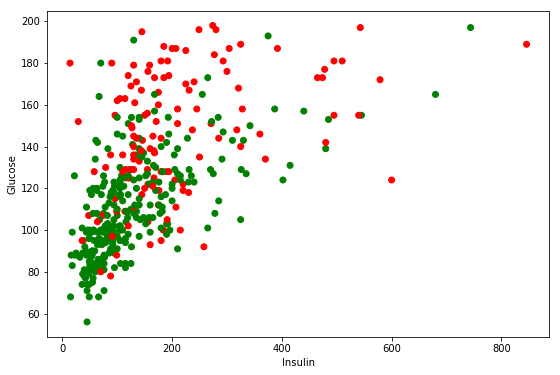

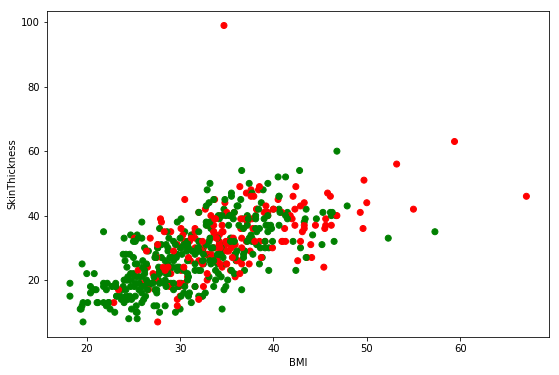

In [0]:
## Scatterplot of correlated pairs of variables

pairs = [
	('Pregnancies', 'Age'),
	('Insulin', 'Glucose'),
	('BMI', 'SkinThickness'),
]

def scatterplot(v1, v2):
	good = np.logical_not(dataset[v1].isnull()) & np.logical_not(dataset[v2].isnull())
	xx = dataset.loc[good, v1]
	yy = dataset.loc[good, v2]
	cc = np.array(['g', 'r'])[dataset.loc[good, "Outcome"]]

	fig = plt.figure(figsize=(9, 6))
	plt.scatter(xx, yy, c=cc)

	plt.xlabel(v1)
	plt.ylabel(v2)

	# plt.show()
	fig.savefig('scatterplot_%s_%s.png' % (v1, v2))

for v1, v2 in pairs:
	scatterplot(v1, v2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


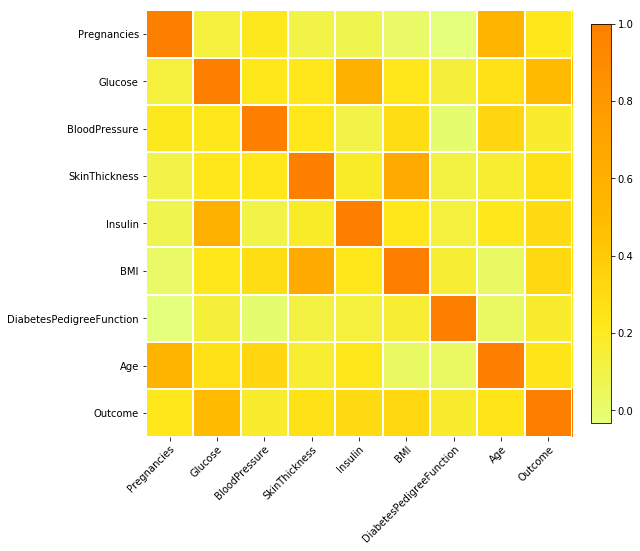

In [0]:
## Correlation heatmap

def heatmap(data, row_labels, col_labels):
	# Adapted from https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels for the rows
        col_labels : A list or array of length M with the labels for the columns

    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """
    fig = plt.figure(figsize=(9, 9))

    ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, cmap="Wistia", interpolation="nearest")

    # Create colorbar
    ax.figure.colorbar(im, ax=ax, fraction=0.043, pad=0.04)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))

    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()

    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.tight_layout()

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)

    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False, right=False, top=False)

    # plt.show()
    fig.savefig('heatmap.png')

heatmap(dataset.corr().as_matrix(), dataset.columns, dataset.columns)